#### **Exercise 1**

Remove the outliers from the `sample_data_with_outliers.csv`!  Plot boxplots of the two features before and after outlier removal.

#### **Exercise 2**

In the following, I've created a sample dataset with an exponential feature and a normal feature. Try using the different scaling methods before running the classifier.  How do your results change:

1.  If you scale the exponential feature using a StandardScaler
2.  If you scale the exponential feature using a Log transform

Logistic Regression without Scaling - Test Accuracy: 0.72


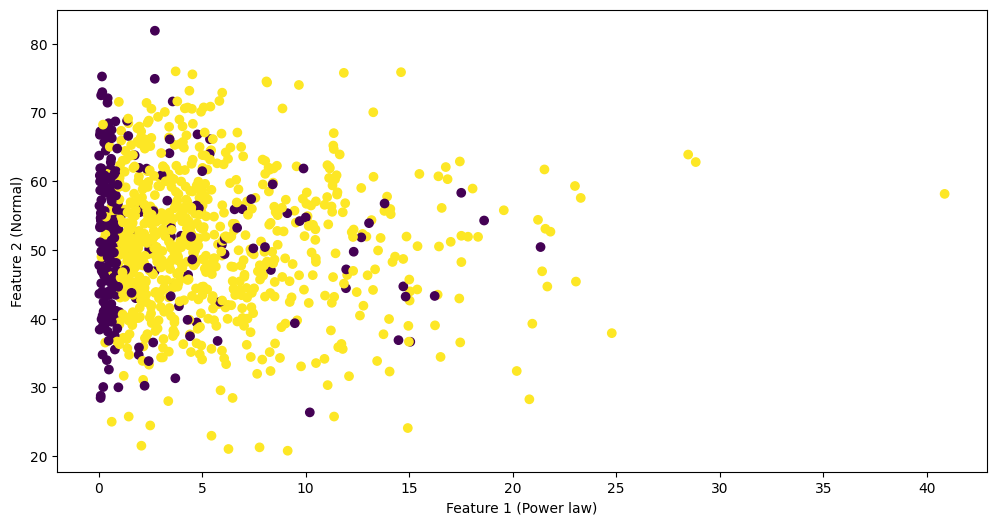

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PowerTransformer
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Create synthetic dataset
n_samples = 1000

# Feature 1: Power law (exponential) distribution
X1 = np.random.exponential(scale=5, size=n_samples)

# Feature 2: Normal distribution
X2 = np.random.normal(loc=50, scale=10, size=n_samples)

# Create labels: simple linear relation to X1 and X2
y = np.array([1 if x1 + 0.001 * x2 > 1 else 0 for x1, x2 in zip(X1, X2)])
flip_indices = np.random.choice(n_samples, size=int(0.1 * n_samples), replace=False)
y[flip_indices] = 1 - y[flip_indices]



# Combine features into single data array
X = np.column_stack((X1, X2))

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression without scaling
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
print(f"Logistic Regression without Scaling - Test Accuracy: {lr.score(X_test, y_test):.2f}")

# Plot original features
plt.figure(figsize=(12, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel('Feature 1 (Power law)')
plt.ylabel('Feature 2 (Normal)')
plt.show()


#### **Exercise 3**

The **Titanic dataset** contains the passenger list for all 768 passengers on the Titanic, as well as who survived.  Note that some features may or may not be meaningful for machine learning purposes.

The following columns are available in the original dataset:

1. **PassengerId**: An unique identifier for each passenger.
2. **Survived**: Whether the passenger survived or not. 1 for survived, 0 for deceased.
3. **Pclass**: The ticket class, indicating the socio-economic status of the passenger (1st = Upper, 2nd = Middle, 3rd = Lower).
4. **Name**: The full name of the passenger, sometimes including titles.
5. **Sex**: Gender of the passenger, usually 'male' or 'female'.
6. **Age**: Age of the passenger in years, although it's fractional if the age is less than one.
7. **SibSp**: The number of siblings or spouses aboard.
8. **Parch**: The number of parents or children aboard.
9. **Ticket**: The ticket number.
10. **Fare**: The amount of money paid for the ticket.
11. **Cabin**: The cabin number where the passenger stayed. This field contains many missing values.
12. **Embarked**: Port of embarkation, where C = Cherbourg, Q = Queenstown, S = Southampton.

Load the titanic data set from the seaborn library. Note that some columns are redundant, or may be labeled somewhat differently than in the original, and several are missing data.  Your task:

1. Load the dataset and identify the columns that have nulls.  Which columns do you think you should try to fill in?  Why?
2. For those that seem like they might matter for machine learning, apply the following methods to fill in nulls:
    - Fill forward, using 'ffill' (see Monday's lecture)
    - Use a "mean" with a SimpleImputer
    - Use a "most_frequent" with a simple imputer
    - Try to use a KNN imputer (see the important note above!).  It won't work!  What does the error say?
3. Compare histograms for your imputation methods.  Which would you pick?  Why?

In [ ]:
# Here's how we load data from seaborn

import seaborn as sns

titanic_data = sns.load_dataset('titanic')
titanic_data

#### **Exercise 4**

Use the one-hot encoding method introduced in [](4-encoding.ipynb) for encoding multiple columns to one-hot encode the following data. 

In [ ]:
sample = pd.DataFrame({
    'color': ['red', 'blue', 'green', 'red', 'blue', 'green'],
    'target': ['apple', 'sky', 'grass', 'sky', 'moon', 'apple']
})

# Your code here

#### **Exercise 5**

In along with this notebook, there is a data file called `synthetic_patient_data.csv` which simulates a dataset of patients who have been examined for cardiovascular disease (CVD).  The data contains the following columns:

#### Columns:
1. **gender** (Categorical): Gender of the patient. (Male, Female)
2. **age** (Numeric): Age of the patient.
3. **bmi** (Numeric): Body Mass Index of the patient.
4. **systolic_bp** (Numeric): Systolic blood pressure level of the patient.
5. **diastolic_bp** (Numeric): Diastolic blood pressure level of the patient.
6. **cholesterol_level** (Numeric): Cholesterol level of the patient. 
7. **exercise_frequency** (Categorical): How often the patient exercises.
8. **smoker** (Categorical): Whether the patient is a smoker or not. (0=No, 1=Yes).
9. **family_history** (Categorical): Whether the patient has a family history of the disease. (0=No, 1=Yes).
10. **diet_quality** (Categorical): Quality of the patient's diet. 
11. **us_state** (Categorical): The US State where the patient resides.
12. **has_disease** (Binary): Whether the patient has the disease or not. (0=No, 1=Yes).

#### Task:
Impute missing values categorical and numeric columns, using several different methods:

- For BMI, use a KNN imputer (KNNImputer) and a SimpleImputer with a mean value
- For exercise frequency, use the CategoricalKNNImputer we defined above and a SimpleImputer with a "most_frequent" value.  

Compare histograms.  Which looks the best to you?

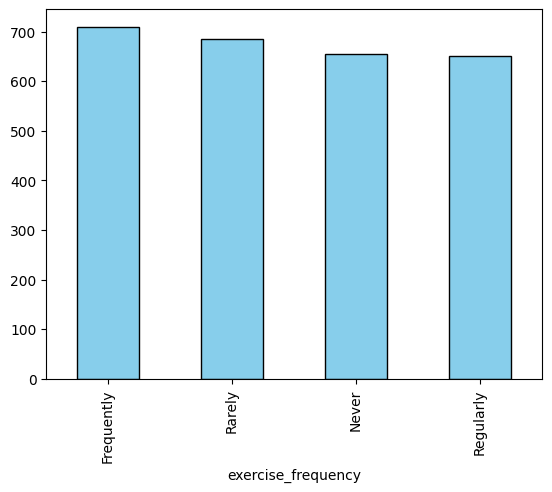

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
# Note: To examine distributions on categorical columns, you can simply use bar charts, like this
data = pd.read_csv("data/synthetic_patient_data.csv")
exercise_frequency_counts = data.exercise_frequency.value_counts() 
exercise_frequency_counts.plot(kind='bar',color='skyblue', edgecolor='black')
plt.show()